In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
data_dir = os.path.expanduser("~/Downloads/Clinic/tarsalis_data_clean")
os.chdir(data_dir)

In [3]:
!ls | wc -l
!du -sh
!ls

62
329M	.
cxthand1sep2021no1.csv	    cxtonhand24nov2021no9.csv
cxthand1sep2021no7.csv	    cxtonhand27oct2021no9.csv
cxthand30aug2021no11.csv    cxtonhand30nov2021no1.csv
cxthand30aug2021no12.csv    cxtonhand30nov2021no6b.csv
cxthand30aug2021no2.csv     cxtonhand6dec2021no2.csv
cxthand8sep2021no1.csv	    cxtonhand6dec2021no3.csv
cxthand8sep2021no4.csv	    cxtonhand8dec2021no12.csv
cxthand8sep2021no8.csv	    cxtonhand8dec2021no1b.csv
cxtonhand10nov2021no10.csv  cxtonhand8dec2021no2.csv
cxtonhand10nov2021no11.csv  cxtonhand8dec2021no3.csv
cxtonhand10nov2021no5.csv   cxtonhand8dec2021no5.csv
cxtonhand10nov2021no7.csv   cxtonhand8dec2021no7.csv
cxtonhand14dec2021no1.csv   cxtonhand8dec2021no9.csv
cxtonhand14jan2021no1.csv   cxtonhandkc22feb2022no2.csv
cxtonhand14jan2021no3.csv   cxtonhandkc22feb2022no6.csv
cxtonhand14jan2021no8.csv   cxtonhandkcage16feb2022no5.csv
cxtonhand18nov2021no4.csv   cxtonhandkccage24feb2022no12b.csv
cxtonhand18nov2021no8.csv   cxtonhandkccage24feb2022no13.csv
cxton

In [4]:
df = pd.read_csv("handcxt17aug2021no2.csv")

In [5]:
df

,Unnamed: 0,resistance,voltage,current,time,pre_rect,post_rect,labels
0,0,7,150,AC,0.00,-0.251465,5.393066,NP
1,1,7,150,AC,0.01,-0.251465,5.394287,NP
2,2,7,150,AC,0.02,-0.252686,5.394287,NP
3,3,7,150,AC,0.03,-0.253906,5.394287,NP
4,4,7,150,AC,0.04,-0.251465,5.394287,NP
...,...,...,...,...,...,...,...,...
121172,121172,7,150,AC,1211.72,-1.314697,1.217041,NP
121173,121173,7,150,AC,1211.73,-1.318359,1.217041,NP
121174,121174,7,150,AC,1211.74,-1.318359,1.215820,NP
121175,121175,7,150,AC,1211.75,-1.319580,1.217041,NP


In [6]:
#%matplotlib qt
%matplotlib inline

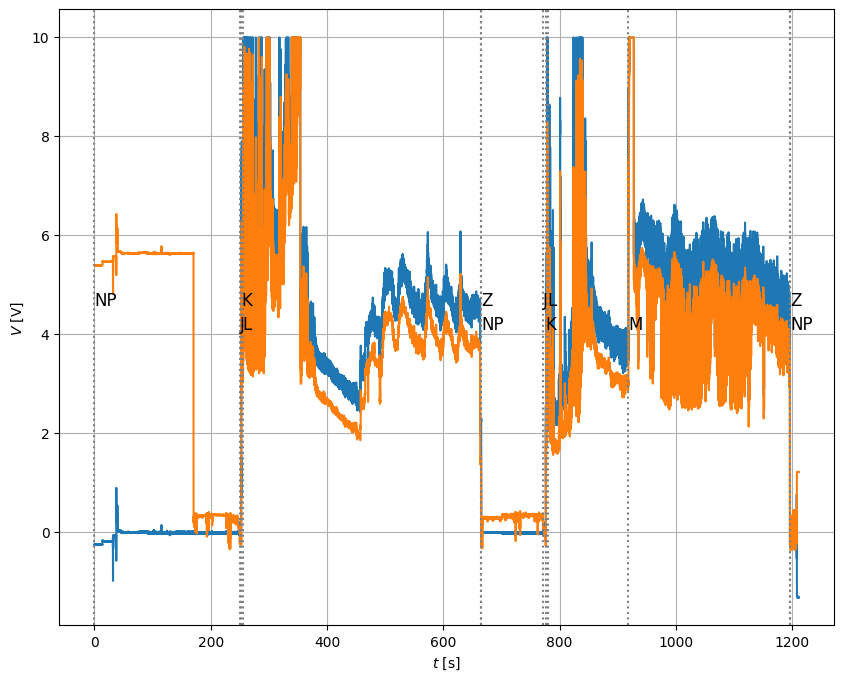

In [7]:
plt.figure(figsize=(10,8))
plt.plot(df["time"], df["pre_rect"],  label="pre_rect")
plt.plot(df["time"], df["post_rect"], label="post_rect")
plt.xlabel("$t$ [s]")
plt.ylabel("$V$ [V]")
#plt.legend()
plt.grid()

def add_labels(df):
    # find rows where the label changes so they can be annotated
    label_change = df["labels"].shift() != df["labels"]
    label_change_rows = df.loc[df.index[label_change]]
    for i, (index, row) in enumerate(label_change_rows.iterrows()):
        plt.axvline(row["time"], color='gray', linestyle='dotted')
        plt.text(row["time"], np.mean(plt.ylim()) + 0.02 * np.diff(plt.ylim()) * (-1)**i, row["labels"], fontsize=12)

add_labels(df)

In [8]:
#if not 'dfs' in globals():
dfs = {f: pd.read_csv(f) for f in sorted(glob.glob("*.csv"))}

In [9]:
!rm -r /tmp/out

In [10]:
plt.ioff()

# outdir = os.path.join(os.path.dirname(subprocess.check_output("mktemp -u".split(" ")).decode().rstrip()), "out")
outdir="/tmp/out"

for f, dfi in dfs.items():
    outfile = os.path.join(outdir, f"{f}.png")
    if not os.path.isfile(outfile):
        
        plt.figure(figsize=(10,7))

        plt.plot(dfi["time"], dfi["pre_rect"],  label="pre_rect")
        # plt.plot(dfi["time"], dfi["post_rect"], label="post_rect")
        # NOTE: shifting to avg of post_rect so that more of plot can be seen!
        plt.plot(dfi["time"], dfi["post_rect"] - dfi["post_rect"].mean() + dfi["pre_rect"].mean(), label="post_rect + shifted")
        plt.xlabel("$t$ [s]")
        plt.ylabel("$V$ [V]")
        plt.title(f)
        plt.legend()
        plt.grid()

        add_labels(dfi)
        
        !mkdir -p '{outdir}'
        plt.savefig(outfile)
        plt.close()

plt.ion()

viewer="".join([f'<img src="{f}.png" width="33%"/>' for f in sorted(glob.glob("*.csv"))])
!echo '{viewer}' > /tmp/out/index.html

In [11]:
!xdg-open /tmp/out/index.html

In [12]:
!du -sh /tmp/out

4.5M	/tmp/out


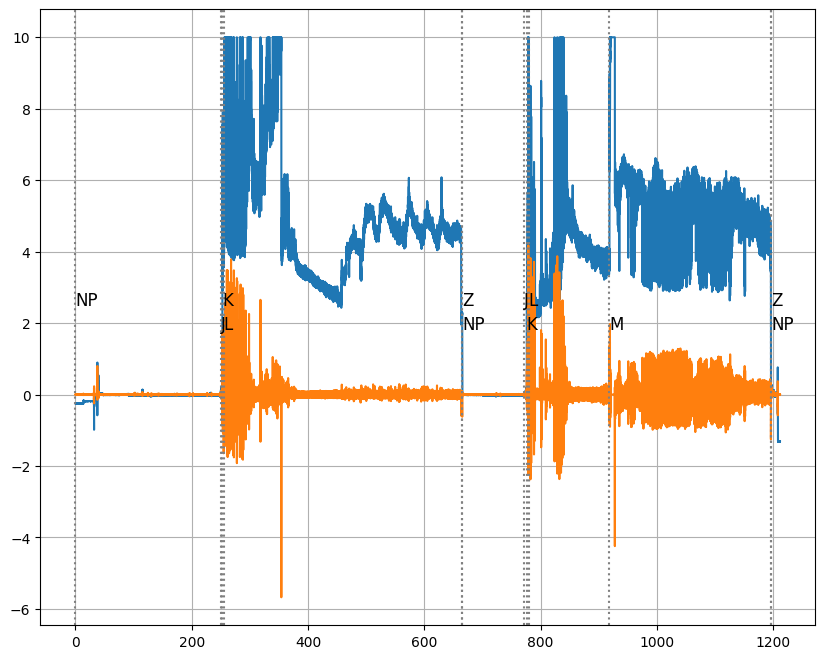

In [13]:
plt.figure(figsize=(10,8))
plt.plot(df["time"], df["pre_rect"])
plt.plot(df.time[:-1], np.diff(df["pre_rect"]))
add_labels(df)
plt.grid()

In [14]:
!rm -r /tmp/out2

In [15]:
plt.ioff()

outdir = "/tmp/out2"
for f, dfi in dfs.items():
    outfile = os.path.join(outdir, f"{f}.png")
    if not os.path.isfile(outfile):
        
        plt.figure(figsize=(10,7))
        plt.plot(dfi["time"], dfi["pre_rect"], label="pre_rect")
        plt.plot(dfi.time[:-1], np.diff(dfi["pre_rect"]), label="pre_rect first diff")
        add_labels(dfi)
        plt.grid()
        plt.xlabel("$t$ [s]")
        plt.ylabel("$V$ [V]")
        plt.title(f)
        plt.legend()

        !mkdir -p '{outdir}'
        plt.savefig(outfile)
        plt.close()

plt.ion()

In [16]:
freq = 1 / np.mean(np.diff(df["time"]))
freq

np.float64(100.0)

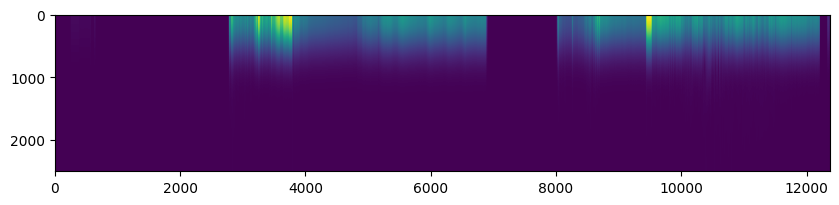

In [17]:
# https://docs.scipy.org/doc/scipy/tutorial/signal.html
# https://docs.scipy.org/doc/scipy/tutorial/fft.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ShortTimeFFT.html

from scipy import signal

window = signal.windows.gaussian(5000, std=2, sym=False)
SFT = signal.ShortTimeFFT(win=window, hop=10, fs=freq, scale_to='magnitude')

out = SFT.stft(np.array(df["pre_rect"]))

plt.figure(figsize=(10, 5))
plt.imshow(abs(out))

In [18]:
from scipy import fft
#plt.figure(figsize=(10,8))
#plt.plot(abs(fft.fft(df["pre_rect"])))

In [19]:
# plt.ioff()
# 
# outdir = "/tmp/out3"
# for f, dfi in dfs.items():
#     outfile = os.path.join(outdir, f"{f}.png")
#     
#     #if not os.path.isfile(outfile):
#     if True:
#         
#         plt.figure(figsize=(10,5))
# 
#         plt.plot(abs(fft.fft(dfi["pre_rect"])))
#         plt.title(f)
#         
#         !mkdir -p '{outdir}'
#         plt.savefig(outfile)
#         plt.close()
# 
# plt.ion()

In [20]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [21]:
%matplotlib qt
#dfx = dfs["cxtonhandkccage24feb2022no12b.csv"]
dfx = dfs["cxtonhandkc22feb2022no2.csv"]
plt.figure(figsize=(10,8))
plt.plot(dfx["time"], dfx["pre_rect"])
plt.plot(dfx.time[:-1], np.diff(dfx["pre_rect"]))
add_labels(dfx)
plt.grid()
plt.show()

QSocketNotifier: Can only be used with threads started with QThread
qt.qpa.wayland: Wayland does not support QWindow::requestActivate()


In [22]:
%matplotlib inline

In [23]:
assert False

AssertionError: 

In [ ]:
%matplotlib qt
for f, dfi in dfs.items():
    plt.figure(figsize=(10,7))
    plt.plot(dfi["time"], dfi["pre_rect"],  label="pre_rect")
    plt.plot(dfi["time"], dfi["post_rect"] - dfi["post_rect"].mean() + dfi["pre_rect"].mean(), label="post_rect + shifted")
    plt.xlabel("$t$ [s]")
    plt.ylabel("$V$ [V]")
    plt.title(f)
    plt.legend()
    plt.grid()
    add_labels(dfi)
    plt.show(block=True)
    plt.close()